<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">About Author</h1>

<div style="border: 2px solid #14adc6; padding: 10px; max-width: 1000px; margin: 0 auto;">
    <p>
        Hey , What's up Guys 🌟
    </p>
    <p>
        I am <b>Tayyab Hussain</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of KeepLearning and KeepSupporting, as I am committed to constant growth and uplifting others in the field. 🚀
    </p>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/tayyab-hussain-72b972267?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries! 📊
    </p>
    <p>My skills include:</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
        <li>Data Analysis 📉</li>
        <li>Machine Learning 🤖</li>
        <li>Deep Learning 🧠</li>
        <li>Statistical Modeling 📈</li>
        <li>Data Visualization 📊</li>
    </ul>
    <p>If you find any content helpful, consider giving it an upvote. Your support means a lot! 👍</p>

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;"> Twitter sentiment analysis.</h1>

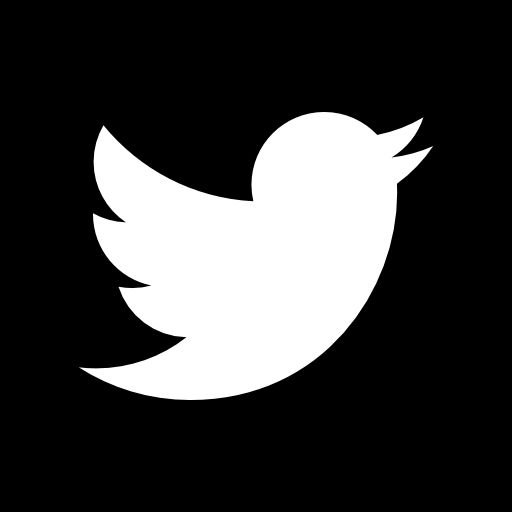

In [45]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/twitter/twtter.jpg'

# Display the image
display(Image(filename=image_path))

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">import libraries</h1>

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Preprocessing</h1>

In [3]:
# Load datasets with detected encoding
train_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', encoding='latin-1')
test_df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', encoding='latin-1')


In [4]:
import pandas as pd

train_df.columns = ['Column1', 'Column2', 'Column3', 'Column4']
test_df.columns = ['Column1', 'Column2', 'Column3', 'Column4']



In [5]:
train_df.head()

,Column1,Column2,Column3,Column4
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
test_df.head()

,Column1,Column2,Column3,Column4
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [7]:
train_df.shape

(74681, 4)

In [50]:
test_df.shape

(999, 4)

In [40]:
train_df = train_df.dropna(subset=['Column4'])

train_df.shape


(66952, 4)

In [9]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet


In [10]:
# Clean the training data
train_df['Column4'] = train_df['Column4'].apply(clean_tweet)

# Clean the test data
test_df['Column4'] = test_df['Column4'].apply(clean_tweet)


In [46]:
train_df['Column4'] = train_df['Column4'].str.lower()
test_df['Column4'] = test_df['Column4'].str.lower()

In [13]:
# Drop rows where 'OriginalTweet' is empty
train_df = train_df.dropna(subset=['Column4'])
test_df = test_df.dropna(subset=['Column4'])

# Alternatively, if there are rows with just whitespace, use this to remove them as well:
train_df = train_df[train_df['Column4'].str.strip() != '']
test_df = test_df[test_df['Column4'].str.strip() != '']

# Display the updated dataframe
train_df.head()

,Column1,Column2,Column3,Column4
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [49]:
test_df.head()

,Column1,Column2,Column3,Column4
0,352,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,why do i pay for word when it functions so poo...
2,4371,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,now the president is slapping americans in the...
4,6273,FIFA,Negative,hi iâ ve had madeleine mccann in my cellar for...


In [14]:
train_df['Column3'].value_counts()

Column3
Negative      22261
Positive      20586
Neutral       17991
Irrelevant    12815
Name: count, dtype: int64

In [41]:
print(train_df['Column4'].iloc[224])

finally got around to starting borderlands this weekend and i turned it over so many made


In [18]:
train_df.duplicated().sum()

4407

In [43]:
# Drop duplicates based on specific columns (e.g., 'Column1' and 'Column4')
train_df = train_df.drop_duplicates(subset=['Column4'])



In [44]:
# Drop duplicates
# train_df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", train_df.shape)

 Shape of dataframe after dropping duplicates:  (66952, 4)


In [21]:
# Separate features and labels for training data
train_texts = train_df['Column4'].values
train_labels = train_df['Column3'].values

# Separate features and labels for test data
test_texts = test_df['Column4'].values
test_labels = test_df['Column3'].values


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [23]:
# Initialize the tokenizer
tokenizer = Tokenizer()  # You can adjust the number of words

# Fit the tokenizer on the training texts
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)

In [24]:
len(tokenizer.word_index)

30705

In [25]:
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [26]:
# Maximum Length in X_train_sequences
maxlen = max(len(tokens) for tokens in train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 166


In [27]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [28]:
train_padded.shape

(66952, 166)

In [29]:
test_padded.shape

(999, 166)

In [30]:
print(f"train_padded shape: {train_padded.shape}")
print(f"test_padded shape: {test_padded.shape}")


train_padded shape: (66952, 166)
test_padded shape: (999, 166)


In [31]:
# Embedding Input Size
input_size = np.max(train_padded) + 1
input_size

30275

In [ ]:
# # Convert to TensorFlow Datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((train_padded, train_labels_encoded))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_padded, test_labels_encoded))

# # Optionally, shuffle and batch the datasets
# batch_size = 32
# train_dataset = train_dataset.shuffle(len(train_padded)).batch(batch_size, drop_remainder=True)
# test_dataset = test_dataset.batch(batch_size, drop_remainder=True)


<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">model building</h1>

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Add an embedding layer 
model.add(Embedding(input_dim=input_size, output_dim=100, input_shape=(56,)))

# Add a bidirectional LSTM layer with 128 units
model.add(Bidirectional(LSTM(128, kernel_regularizer=l2(0.1), return_sequences=True, recurrent_regularizer=l2(0.1))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add another LSTM layer
model.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01))))
# Add batch normalization layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 5 units for 5 labels and softmax activation
model.add(Dense(5, activation='softmax'))

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">summery</h1>

In [33]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 56, 100)        │     3,027,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 56, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,436,465 (13.11 MB)

 Trainable params: 3,435,697 (13.11 MB)

 Non-trainable params: 768 (3.00 KB)

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">compile</h1>

In [34]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#523887; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">fit</h1>

In [35]:
# Train the model
history = model.fit(
    train_padded,
    train_labels_encoded ,
    validation_data=(test_padded,test_labels_encoded),
    epochs=10
)

Epoch 1/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 92s 41ms/step - accuracy: 0.4387 - loss: 8.6869 - val_accuracy: 0.6547 - val_loss: 0.9495
Epoch 2/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.7913 - loss: 0.7092 - val_accuracy: 0.8609 - val_loss: 0.5112
Epoch 3/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.8391 - loss: 0.5784 - val_accuracy: 0.8098 - val_loss: 0.6789
Epoch 4/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.8687 - loss: 0.4890 - val_accuracy: 0.8889 - val_loss: 0.4140
Epoch 5/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.8854 - loss: 0.4349 - val_accuracy: 0.8719 - val_loss: 0.4474
Epoch 6/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 141s 40ms/step - accuracy: 0.8985 - loss: 0.3995 - val_accuracy: 0.7828 - val_loss: 0.7976
Epoch 7/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9068 - loss: 0.3668 - val_accuracy: 0.8789 - val_loss: 0.4686
Epoch 8/10
2093/2093 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.9130 

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_padded , test_labels_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9284 - loss: 0.3039
Test Loss: 0.3201986849308014
Test Accuracy: 0.9269269108772278


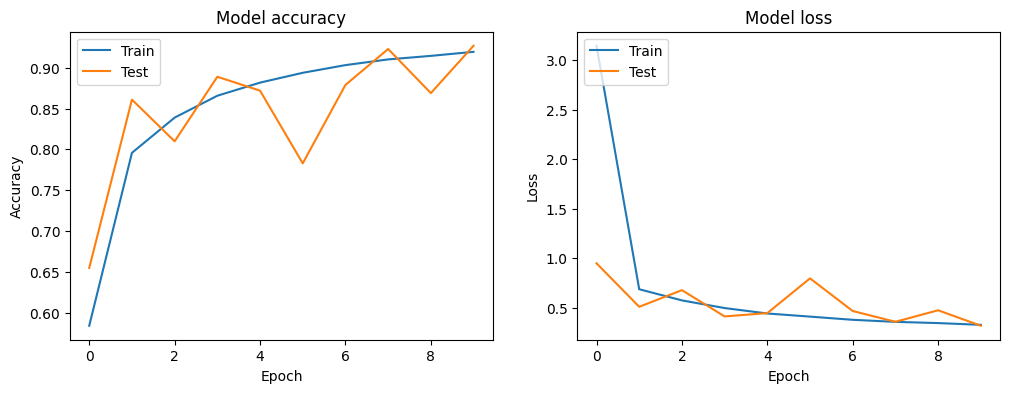

In [37]:
# Visualize training history (optional)
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

 **Twitter Sentiment Analysis: Currently at 92% Accuracy, I'll wnhance the performance through different experiments in the next version**

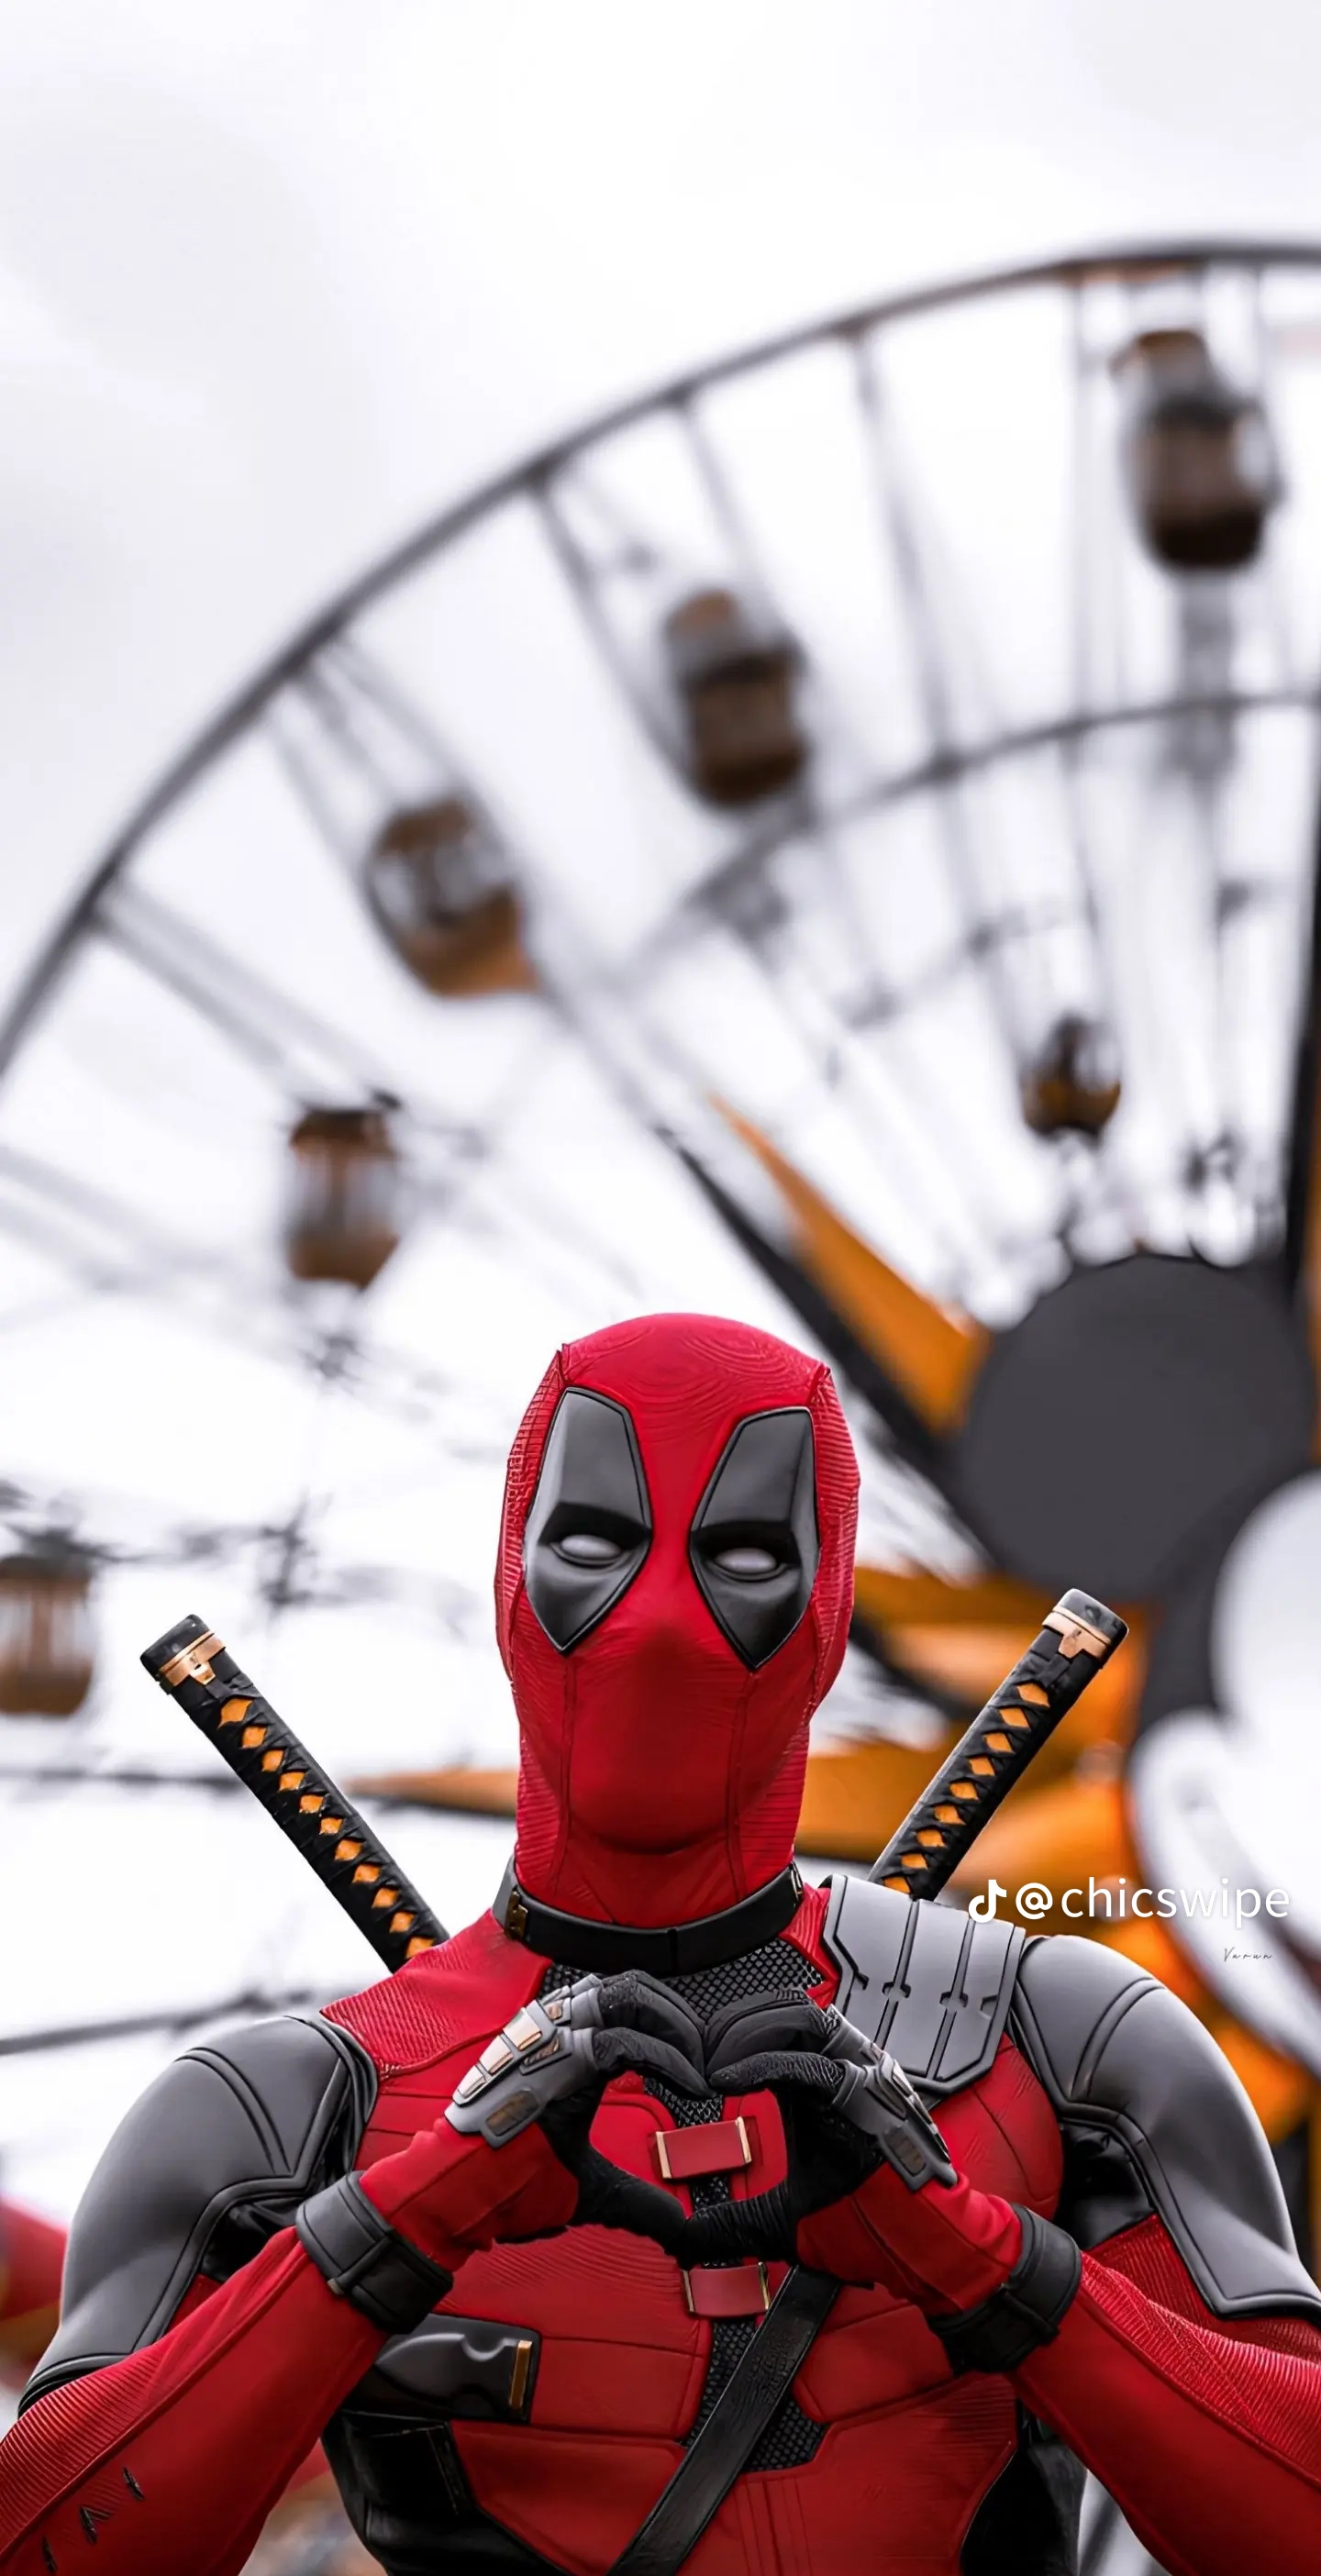

In [48]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/thanksss/tyb.png'

# Display the image
display(Image(filename=image_path))